In [16]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [46]:
df = pd.read_csv('C:/utkface_sortAge.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head(5)

,age,gender,ethnicity,image
0,1,1,0,109 146 198 132 169 221 134 171 223 137 174 22...
1,1,0,3,0 1 2 2 1 1 5 1 0 11 3 3 1 0 6 27 35 45 97 111...
2,1,0,3,54 64 91 55 66 95 56 72 105 58 76 113 67 85 12...
3,1,0,3,80 98 125 77 94 129 113 131 169 147 169 201 16...
4,1,0,3,63 55 96 58 51 94 72 67 112 83 80 126 91 90 13...


In [48]:
df.age.unique(), df.gender.unique(), df.ethnicity.unique()

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  95,  96,  99, 100, 101, 103, 105, 110, 111, 115, 116],
       dtype=int64),
 array([1, 0], dtype=int64),
 array(['0', '3', '2', '4', '1', '20170116174525125.jpg.chip.jpg',
        '20170109150557335.jpg.chip.jpg', '20170109142408075.jpg.chip.jpg'],
       dtype=object))

In [49]:
df1 = df.copy()

In [50]:
df1 = df1.loc[(df1.ethnicity == '0') | (df1.ethnicity == '1') | (df1.ethnicity == '2') | (df1.ethnicity == '3') | (df1.ethnicity == '4')]
df1.ethnicity.unique()

array(['0', '3', '2', '4', '1'], dtype=object)

In [51]:
print(X.size)


23705


In [52]:
print(X.shape)


(23705,)


In [53]:
print(df1['image'].dtype)



object


In [54]:
from PIL import Image
import numpy as np

# Assuming 'image' column contains file paths
image_paths = df1['image'].to_list()

# Load images and convert to NumPy arrays
images = [np.array(Image.open('C:/Users/whynew.in/Pictures/Saved Pictures/download.jpg')) for path in image_paths]

# Convert the list of arrays to a NumPy array
X = np.array(images)


In [55]:
unique_shapes = np.unique([img.shape for img in X])
print(unique_shapes)


[  3 187 269]


In [58]:
X = np.array(df1['image'].to_list())
X_reshaped = X.reshape(X.shape[0])
X_reshaped.shape

(23705,)

In [68]:
print(X_reshaped.dtype)


<U29999


In [71]:
 df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


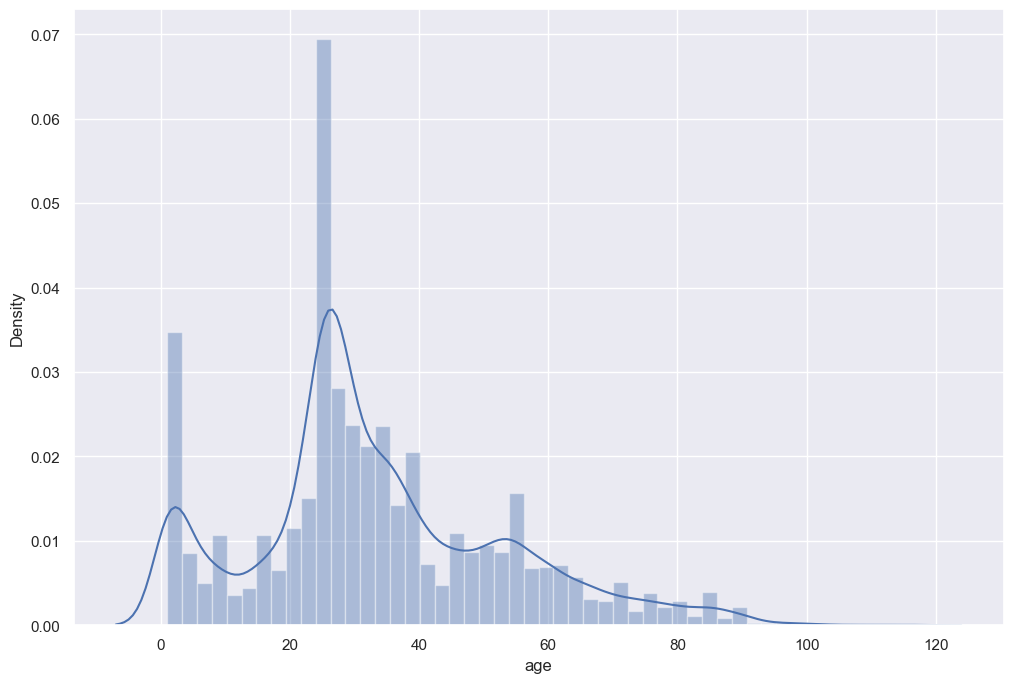

In [72]:
plt.figure(figsize=(12,8))
sns.distplot(df['age']);


In [73]:
df.age.value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: age, Length: 104, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


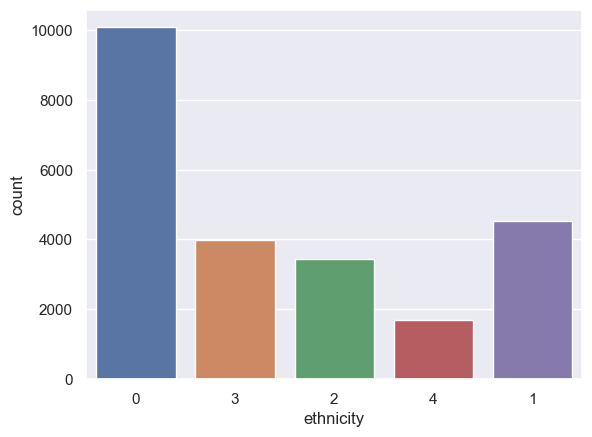

In [74]:
sns.countplot(df1['ethnicity']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


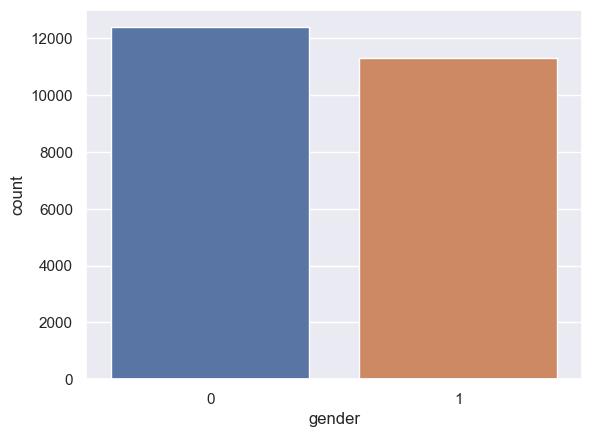

In [75]:
sns.countplot(df['gender']);

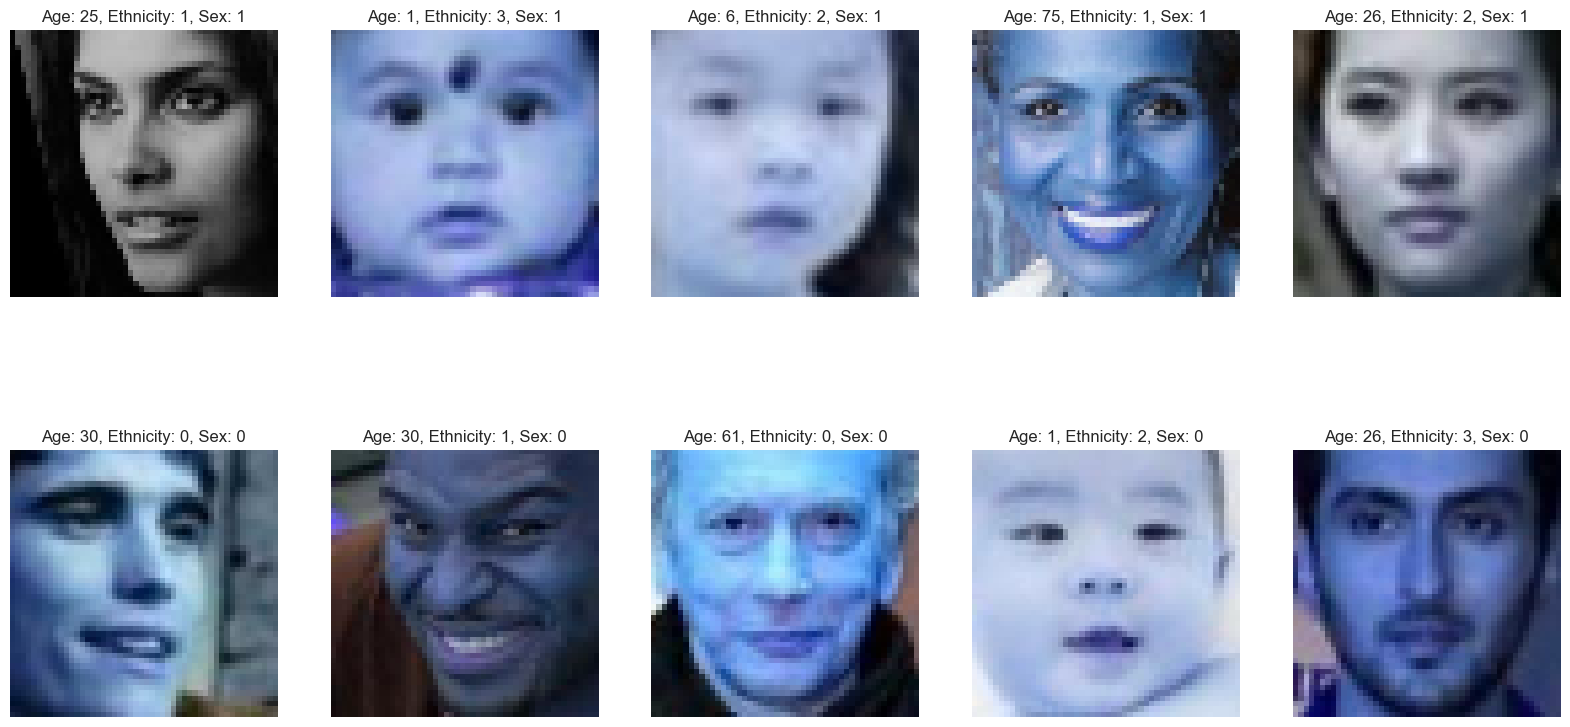

In [79]:
# Plot some pictures
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(2):
    for j in range(5):
        random_face = np.random.choice(len(df))

        age = df['age'][random_face]
        ethnicity = df['ethnicity'][random_face]
        gender = df['gender'][random_face]

        axes[i][j].set_title('Age: {0}, Ethnicity: {1}, Sex: {2}'.format(age, ethnicity, gender))
        axes[i][j].imshow(df['image'][random_face], cmap='gray')
        axes[i][j].axis('off')